In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [3]:
raw_df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')


In [4]:
def day4pr1(raw_df):
    # 1. How many different companies are represented in the data set?
    return len(raw_df.index)
print(day4pr1(raw_df))

450


In [5]:
def day4pr2(raw_df):
    # 2. What is the total number of jobs created for businesses in Queens?
    queens_df = raw_df.loc[raw_df['Borough'] == 'Queens']
    # We want to know about job creation. Fill in all nans with 0 jobs created
    queens_df.loc[queens_df['Job created'].isna()] = 0
    return int(sum(queens_df['Job created']))
print(day4pr2(raw_df))

102


In [6]:
def get_domain(emailStr):
    if '@' in emailStr:
        emailParts = emailStr.strip().split('@')
        return emailParts[1].lower()
    else:
        return emailStr.lower()

In [7]:
def day4pr3(raw_df):
    # 3. How many unique email domains names are there in the data set?
    domain_series = raw_df['company email'].loc[raw_df['company email'].notna()].apply(get_domain)
    return domain_series.nunique()
print(day4pr3(raw_df))

361


In [8]:
def day4pr4(raw_df):
    # 4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs\
    #       created for each NTA?
    nta_array = raw_df['NTA'].unique()
    out_dict = {}
    for nta in nta_array:
        tmp_df = raw_df.loc[raw_df['NTA'] == nta]
        if len(tmp_df.index) >= 5:
            results = np.zeros(2)  # [avg savings, total jobs created]
            # Clean nans
            tmp_df['Total Savings'].loc[tmp_df['Total Savings'].isna()] = 0
            tmp_df['Job created'].loc[tmp_df['Job created'].isna()] = 0
            results[0] = tmp_df['Total Savings'].mean()
            results[1] = tmp_df['Job created'].sum()
            out_dict[nta] = results
    out_df = pd.DataFrame(out_dict).transpose()
    out_df.columns = ['Average Total Savings', 'Total Jobs Created']
    out_df.to_csv('day4_pr4.csv')
day4pr4(raw_df)

C:\Users\ablee\AppData\Local\Temp\ipykernel_21048\3045420117.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['Total Savings'].loc[tmp_df['Total Savings'].isna()] = 0
C:\Users\ablee\AppData\Local\Temp\ipykernel_21048\3045420117.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['Job created'].loc[tmp_df['Job created'].isna()] = 0


In [9]:
# day 5
# 1. scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average
#       savings.
# 2. histogram of the log of the average total savings.
# 3. line plot of the total jobs created for each month.

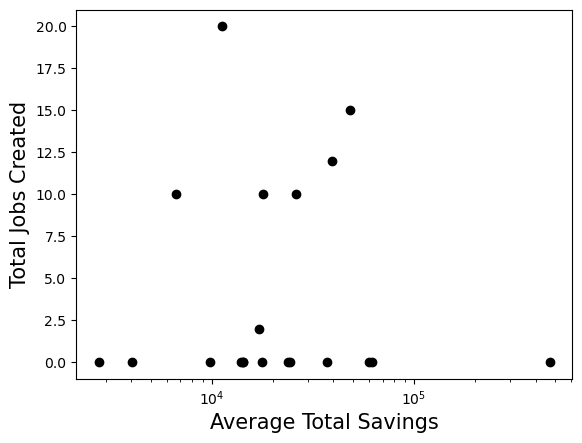

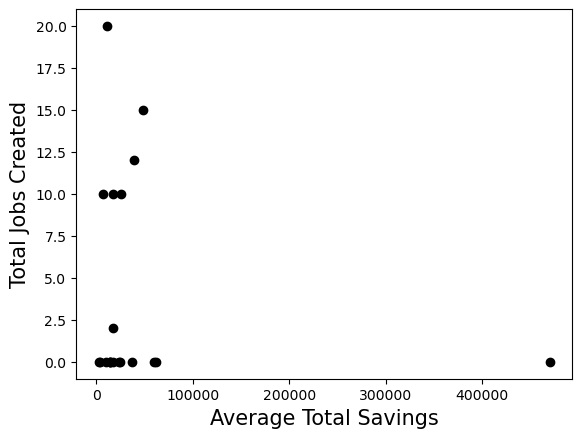

In [10]:
def day5pr1(dataFile, logFlag):
    # Assume that this is for the day 4 problem 4 data that was already cleaned, since there are no average savings
    # fields except for the one I already created
    df = pd.read_csv(dataFile)

    fig = plt.figure()
    ax = fig.gca()
    ax.plot(df['Average Total Savings'], df['Total Jobs Created'], linestyle='', marker='o', color='k')
    ax.set_xlabel('Average Total Savings', fontsize=15)
    ax.set_ylabel('Total Jobs Created', fontsize=15)
    if logFlag:
        ax.set_xscale('log')
        fig.savefig('day5/pr1_log.pdf', bbox_inches='tight')
    else:
        fig.savefig('day5/pr1_linear.pdf', bbox_inches='tight')
day5pr1('day4_pr4.csv', True)
day5pr1('day4_pr4.csv', False)

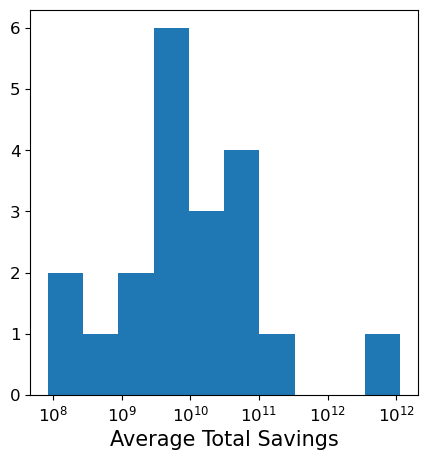

In [12]:
def day5pr2(dataFile):
    # 2. histogram of the log of the average total savings.
    df = pd.read_csv(dataFile)
    fig = plt.figure(figsize=(5, 5))
    ax = fig.gca()
    plt.hist(np.log(df['Average Total Savings']))
    ax.set_xticks([8, 9, 10, 11, 12, 13])
    ax.set_xticklabels([r'$10^8$', r'$10^9$', r'$10^{10}$', r'$10^{11}$', r'$10^{12}$', r'$10^{12}$'])
    ax.tick_params(labelsize=12)
    ax.set_xlabel('Average Total Savings', fontsize=15)
    fig.savefig('day5/pr2.pdf', bbox_inches='tight')
day5pr2('day4_pr4.csv')

In [11]:
def make_date(dateStr):
    '''converts strings to dates but makes it the first of every month because we only care about the dates'''
    parts = dateStr.split('/')
    return datetime.datetime(int(parts[2]), int(parts[0]), 1)


C:\Users\ablee\AppData\Local\Temp\ipykernel_21048\1706708747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job created'].loc[df['Job created'].isna()] = 0


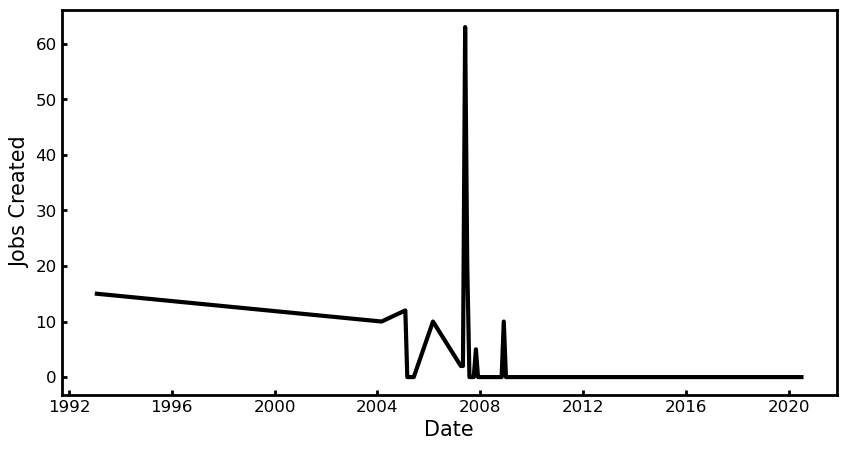

In [13]:
def day5pr3(raw_df):
    # 3. line plot of the total jobs created for each month.
    date_series = raw_df['Effective Date'].apply(make_date)
    df = raw_df[['Effective Date', 'Job created']].copy()
    df['Effective Date'] = date_series
    df['Job created'].loc[df['Job created'].isna()] = 0

    data = df.groupby('Effective Date')['Job created'].sum()

    fig = plt.figure(figsize=(10,5))
    ax = fig.gca()
    plt.plot(data, linewidth=3, color='k')
    ax.set_xlabel('Date', fontsize=15)
    ax.set_ylabel('Jobs Created', fontsize=15)
    plt.setp(ax.spines.values(), linewidth=2)
    ax.tick_params(labelsize=12, direction='in', width=2)
    fig.savefig('day5/pr3.pdf', bbox_inches='tight')
day5pr3(raw_df)